Loading dataset...

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB

Daily sales data:
                    sales
date                     
2013-01-01    2511.618999
2013-01-02  496092.417944
2013-01-03  361461.231124
2013-01-04  354459.677093
2013-01-05  477350.121229

Actual vs Moving Averages:
                    sales           MA_7          MA_30
date                                                   
2013-01-01    2511.618999            NaN            NaN
2013-01-02  496092.417944            NaN            NaN
2013-01-03  361461.231124            NaN            Na

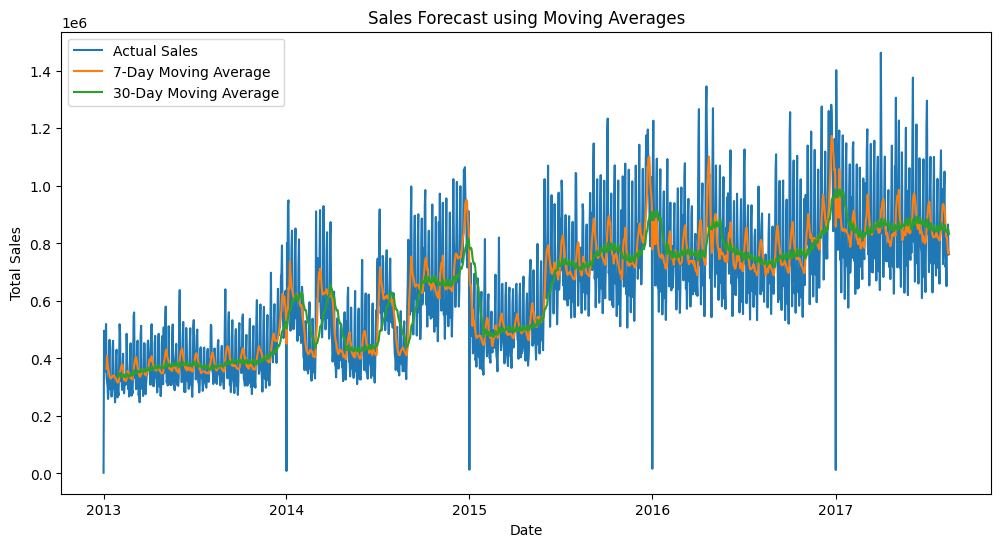


Forecast file saved as Sales_Moving_Average_Forecast.xlsx


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("Loading dataset...")
df = pd.read_csv("train.csv")


df['date'] = pd.to_datetime(df['date'])
df = df.drop_duplicates()

print("\nDataset Info:")
df.info()

# Aggregate total sales per day
daily_sales = df.groupby('date')['sales'].sum().reset_index()

# Set date as index
daily_sales.set_index('date', inplace=True)

print("\nDaily sales data:")
print(daily_sales.head())

# Weekly (7-day) moving average
daily_sales['MA_7'] = daily_sales['sales'].rolling(window=7).mean()

# Monthly (30-day) moving average
daily_sales['MA_30'] = daily_sales['sales'].rolling(window=30).mean()

print("\nActual vs Moving Averages:")
print(daily_sales.head(35))

plt.figure(figsize=(12,6))
plt.plot(daily_sales['sales'], label='Actual Sales')
plt.plot(daily_sales['MA_7'], label='7-Day Moving Average')
plt.plot(daily_sales['MA_30'], label='30-Day Moving Average')

plt.title("Sales Forecast using Moving Averages")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.legend()
plt.show()

daily_sales.to_excel("Sales_Moving_Average_Forecast.xlsx")

print("\nForecast file saved as Sales_Moving_Average_Forecast.xlsx")
